In [101]:
# Useful starting lines
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as m
from preprocessing import *
from plots import *
from crossval import *
from logreg import *
from split_data import *
from classification_accuracy import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [90]:
from helpers import *
DATA_TRAIN_PATH = 'C:/Users/joeld/Desktop/EPFL/machine learning/AIAIaie/data/train.csv' # TODO: download train data and supply path here 
#DATA_TRAIN_PATH = '/Users/benoithohl/Desktop/epfl/master_epfl/Ma3/Machine_learning/AIAIaie/data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [91]:
data = pd.read_csv(DATA_TRAIN_PATH)
pd.set_option('display.max_columns', 50)
data.head(12)

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,s,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.200,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497
1,100001,b,160.937,68.768,103.235,48.146,-999.000,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.000,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.000,-999.000,46.226
2,100002,b,-999.000,162.172,125.953,35.635,-999.000,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.000,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.000,-999.000,44.251
3,100003,b,143.905,81.417,80.943,0.414,-999.000,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.000,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,100004,b,175.864,16.915,134.805,16.405,-999.000,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.000,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
5,100005,b,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,61.619,278.876,0.588,0.479,0.975,53.651,0.371,1.329,31.565,-0.884,1.857,40.735,2.237,282.849,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660
6,100006,s,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,2.545,305.967,3.371,1.393,0.791,28.850,1.113,2.409,97.240,0.675,-0.966,38.421,-1.443,294.074,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877
7,100007,s,154.916,10.418,94.714,29.169,-999.000,-999.000,-999.000,2.897,1.526,138.178,0.365,-1.305,-999.000,78.800,0.654,1.547,28.740,0.506,-1.347,22.275,-1.761,187.299,1,30.638,-0.715,-1.724,-999.000,-999.000,-999.000,30.638
8,100008,b,105.594,50.559,100.989,4.288,-999.000,-999.000,-999.000,2.904,4.288,65.333,0.675,-1.366,-999.000,39.008,2.433,-2.532,26.325,0.210,1.884,37.791,0.024,129.804,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
9,100009,s,128.053,88.941,69.272,193.392,-999.000,-999.000,-999.000,1.609,28.859,255.123,0.599,0.538,-999.000,54.646,-1.533,0.416,32.742,-0.317,-0.636,132.678,0.845,294.741,1,167.735,-2.767,-2.514,-999.000,-999.000,-999.000,167.735


In [92]:

data0 = tX[np.nonzero(tX[:,22] == 0)]
data1 = tX[np.nonzero(tX[:,22] == 1)]
data2 = tX[np.nonzero(tX[:,22] == 2)]
data3 = tX[np.nonzero(tX[:,22] == 3)]

print(data0.shape)

(99913, 30)


In [93]:
print("shape of data tX: ",tX.shape)
print("**")
print(len(tX[:,1]))

print(tX[0:30,0])
print("**")

shape of data tX:  (250000, 30)
**
250000
[ 138.47   160.937 -999.     143.905  175.864   89.744  148.754  154.916
  105.594  128.053 -999.     114.744  145.297   82.488 -999.     111.026
  114.256  127.861 -999.    -999.    -999.      90.736   87.075  141.481
  110.785   76.883  137.197  111.271  118.104   98.761]
**


# PREPROCESSING

In [94]:
y[np.nonzero(y == -1)] = 0
Data = remove_features_with_too_many_missing_values(tX,0.66)
Data = replace_missing_values_with_global_mean(Data)
ZData = Z_score_of_each_feature(Data)

trainx,trainy,validationx,validationy = split_data(ZData, y, 0.75, seed=1)
#trainy = np.transpose(np.array(trainy,ndmin=2))
print(trainy)

In [99]:
print(trainy)
trainyas = np.transpose(np.array(trainy,ndmin=2))
print(trainyas)

[1. 0. 0. ... 0. 0. 1.]
[[1.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [1.]]


In [95]:
#Visualization
Data_df = pd.DataFrame(ZData)
Data_df.head(12)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,3.149107e-01,0.068332,0.407680,-0.469966,0.882478,1.033099,0.339894,0.170929,1.277084,-0.270811,0.846712,0.214212,0.225054,1.812288,-1.352820,-0.756757,-0.147267,0.386847,1.044402,-0.369921,1.557298e+00,3.248244e-01,0.412510
1,7.408270e-01,0.552505,0.540136,-0.153167,1.404888,-0.756027,-0.287584,-0.661279,1.292164,0.147536,1.688504,-1.652849,-0.441526,0.411475,0.032730,0.090798,-1.051683,-0.357719,0.021305,-0.821154,5.267049e-01,8.329932e-01,-0.273820
2,-5.388023e-16,3.195156,1.096560,-0.349710,0.989770,-0.430168,0.340361,2.768174,1.292164,-0.292406,-0.571650,-1.147554,3.387682,-0.737951,0.555132,0.382001,-1.200672,0.400135,0.021305,-0.863173,1.487145e+00,-1.434550e+00,-0.293970
3,4.179442e-01,0.910379,-0.005853,-0.903016,1.196690,-0.830735,-0.712705,1.084818,-0.969095,-0.716598,-1.354138,0.010002,0.301873,-0.397234,-1.730447,-0.323312,0.038692,-0.978149,-1.001792,0.000000,1.003673e-17,1.111175e-17,-0.745439
4,1.023804e+00,-0.914556,1.313369,-0.651804,1.938794,-0.112795,-0.868143,-0.451747,-1.052877,-0.468428,-1.800568,-1.223513,-0.765298,0.646261,0.839728,-1.185429,-0.475042,-1.238475,-1.001792,0.000000,1.003673e-17,1.111175e-17,-0.745439
5,-6.088086e-01,-1.009761,-0.539646,0.918192,-1.291464,1.917156,1.040948,-1.005763,0.508808,0.666766,0.314620,0.736020,-0.684128,-0.683404,0.998266,-0.029860,1.239982,0.577488,2.067499,0.121800,-1.742045e+00,-4.559336e-01,1.230371
6,5.098688e-01,-0.576543,0.651504,0.757735,0.725371,-0.735060,1.275085,2.288737,1.274570,-0.439827,0.925785,1.330485,2.292321,0.549027,-0.555730,-0.100206,-0.790677,0.666224,1.044402,0.812469,6.272329e-01,1.040816e+00,1.089751
7,6.266844e-01,-1.098374,0.331435,-0.451288,0.669171,-0.780810,-0.175049,-1.269749,-0.985852,1.788886,0.547719,0.856014,-0.812160,0.415428,-0.765461,-0.591046,-0.966153,-0.177852,0.021305,-1.152798,-5.147361e-01,-1.218187e+00,-0.432856
8,-3.083335e-01,0.037323,0.485126,-0.842157,0.678112,-0.656806,-0.804620,-0.902773,-1.036958,0.013412,2.013031,-1.389193,-0.921610,0.181432,1.013129,-0.119358,0.018827,-0.632361,-1.001792,0.000000,1.003673e-17,1.111175e-17,-0.745439
9,1.174312e-01,1.123253,-0.291707,2.128582,-0.975975,0.446346,0.835660,-0.992741,0.558239,0.711162,-1.253650,0.233477,-0.630786,-0.235176,-0.374073,2.765216,0.471863,0.671497,0.021305,1.764019,-1.998790e+00,-1.780446e+00,0.965872


## Do your crazy machine learning thing here :) ...

## data visualization

In [ ]:
signaldata = ZData[np.nonzero(y == 1)]
nosignaldata = ZData[np.nonzero(y == -1)]

In [ ]:
for i in range(ZData.shape[1]):
    plt.figure
    plt.hist(signaldata[:,i],100,color='b')
    plt.hist(nosignaldata[:,i],100,color='r')
    plt.show()

In [ ]:
cov = np.corrcoef(np.transpose(ZData))
plt.imshow(cov)
plt.colorbar()

## modeling

penalized stepfor: 0.06573070000013104
penalized stepgrad : 9.820000013860408e-05
penalized steploss : 6.279999979597051e-05
penalized stepbatchsize : 1.2100000276404899e-05
entire step : 0.07576220000009926
Current iteration=0, loss=0.6931471805599453
penalized stepfor: 0.06726199999957316
penalized stepgrad : 8.8099999629776e-05
penalized steploss : 6.239999947865726e-05
penalized stepbatchsize : 2.4899999516492244e-05
entire step : 0.076378200000363
penalized stepfor: 0.06263480000052368
penalized stepgrad : 6.7299999500392e-05
penalized steploss : 4.5900000259280205e-05
penalized stepbatchsize : 1.0300000212737359e-05
entire step : 0.06980799999928422
penalized stepfor: 0.06759149999925285
penalized stepgrad : 5.6600000789330807e-05
penalized steploss : 7.709999954386149e-05
penalized stepbatchsize : 6.600000233447645e-06
entire step : 0.07889909999994416
penalized stepfor: 0.059146900000087044
penalized stepgrad : 9.74000004134723e-05
penalized steploss : 6.349999966914766e-05
pen

penalized stepfor: 0.06985729999996693
penalized stepgrad : 5.810000038763974e-05
penalized steploss : 3.459999970800709e-05
penalized stepbatchsize : 7.100000402715523e-06
entire step : 0.0767918000001373
penalized stepfor: 0.06047209999996994
penalized stepgrad : 5.6400000175926834e-05
penalized steploss : 3.3600000278966036e-05
penalized stepbatchsize : 6.400000529538374e-06
entire step : 0.06881939999948372
penalized stepfor: 0.06580970000050002
penalized stepgrad : 6.490000032499665e-05
penalized steploss : 5.0999999984924216e-05
penalized stepbatchsize : 6.600000233447645e-06
entire step : 0.07499449999977514
penalized stepfor: 0.06582539999999426
penalized stepgrad : 5.609999971056823e-05
penalized steploss : 3.4699999559961725e-05
penalized stepbatchsize : 6.399999620043673e-06
entire step : 0.07356090000030235
penalized stepfor: 0.06804439999996248
penalized stepgrad : 5.809999947814504e-05
penalized steploss : 3.420000030018855e-05
penalized stepbatchsize : 6.599999323952943e

entire step : 0.06530919999931939
penalized stepfor: 0.061784800000168616
penalized stepgrad : 5.650000002788147e-05
penalized steploss : 3.569999989849748e-05
penalized stepbatchsize : 6.400000529538374e-06
entire step : 0.06928900000002614
penalized stepfor: 0.06044000000019878
penalized stepgrad : 5.559999954130035e-05
penalized steploss : 3.3799999982875306e-05
penalized stepbatchsize : 6.399999620043673e-06
entire step : 0.06689520000054472
penalized stepfor: 0.05856190000031347
penalized stepgrad : 5.419999979494605e-05
penalized steploss : 3.220000053261174e-05
penalized stepbatchsize : 6.199999916134402e-06
entire step : 0.06547879999925499
penalized stepfor: 0.061335000000326545
penalized stepgrad : 5.359999977372354e-05
penalized steploss : 3.3399999665562063e-05
penalized stepbatchsize : 6.50000038149301e-06
entire step : 0.06891389999964304
penalized stepfor: 0.05937919999996666
penalized stepgrad : 5.469999996421393e-05
penalized steploss : 3.300000025774352e-05
penalized 

penalized stepfor: 0.07001140000011219
penalized stepgrad : 5.740000051446259e-05
penalized steploss : 3.480000032141106e-05
penalized stepbatchsize : 6.8999997893115506e-06
entire step : 0.07883490000040183
penalized stepfor: 0.07314529999985098
penalized stepgrad : 7.480000022042077e-05
penalized steploss : 4.850000004807953e-05
penalized stepbatchsize : 6.799999937356915e-06
entire step : 0.08138789999975415
penalized stepfor: 0.06896150000011403
penalized stepgrad : 5.669999973179074e-05
penalized steploss : 3.400000059627928e-05
penalized stepbatchsize : 6.600000233447645e-06
entire step : 0.07869380000011006
penalized stepfor: 0.06717010000011214
penalized stepgrad : 7.379999988188501e-05
penalized steploss : 3.689999994094251e-05
penalized stepbatchsize : 7.300000106624793e-06
entire step : 0.07458539999970526
penalized stepfor: 0.06301880000046367
penalized stepgrad : 5.510000028152717e-05
penalized steploss : 3.319999996165279e-05
penalized stepbatchsize : 6.399999620043673e-0

entire step : 0.07730009999977483
penalized stepfor: 0.06661689999964437
penalized stepgrad : 5.700000019714935e-05
penalized steploss : 3.3799999982875306e-05
penalized stepbatchsize : 6.399999620043673e-06
entire step : 0.07461440000042785
penalized stepfor: 0.06495549999999639
penalized stepgrad : 5.650000002788147e-05
penalized steploss : 3.4499999856052455e-05
penalized stepbatchsize : 6.600000233447645e-06
entire step : 0.07236869999996998
penalized stepfor: 0.06771410000055766
penalized stepgrad : 5.739999960496789e-05
penalized steploss : 3.509999987727497e-05
penalized stepbatchsize : 6.600000233447645e-06
entire step : 0.07555369999954564
penalized stepfor: 0.060619100000621984
penalized stepgrad : 5.5499999689345714e-05
penalized steploss : 3.2500000088475645e-05
penalized stepbatchsize : 6.300000677583739e-06
entire step : 0.06785119999949529
penalized stepfor: 0.06434040000021923
penalized stepgrad : 5.5900000006658956e-05
penalized steploss : 3.259999994043028e-05
penaliz

entire step : 0.07263859999966371
penalized stepfor: 0.06532439999955386
penalized stepgrad : 5.599999985861359e-05
penalized steploss : 3.3600000278966036e-05
penalized stepbatchsize : 6.299999768089037e-06
entire step : 0.07245309999962046
penalized stepfor: 0.06090519999997923
penalized stepgrad : 5.529999998543644e-05
penalized steploss : 3.370000013092067e-05
penalized stepbatchsize : 6.70000008540228e-06
entire step : 0.06815659999938362
penalized stepfor: 0.06441759999961505
penalized stepgrad : 6.269999994401587e-05
penalized steploss : 5.210000017541461e-05
penalized stepbatchsize : 6.499999471998308e-06
entire step : 0.0725216000000728
penalized stepfor: 0.060542899999745714
penalized stepgrad : 5.739999960496789e-05
penalized steploss : 3.3400000575056765e-05
penalized stepbatchsize : 6.50000038149301e-06
entire step : 0.06829959999959101
penalized stepfor: 0.059630400000060035
penalized stepgrad : 5.599999985861359e-05
penalized steploss : 3.3600000278966036e-05
penalized s

penalized stepfor: 0.07130509999933565
penalized stepgrad : 5.669999973179074e-05
penalized steploss : 3.420000030018855e-05
penalized stepbatchsize : 6.400000529538374e-06
entire step : 0.07911729999977979
penalized stepfor: 0.06557669999983773
penalized stepgrad : 5.719999990105862e-05
penalized steploss : 3.4300000152143184e-05
penalized stepbatchsize : 6.600000233447645e-06
entire step : 0.07287610000003042
penalized stepfor: 0.06336989999999787
penalized stepgrad : 8.849999994708924e-05
penalized steploss : 3.480000032141106e-05
penalized stepbatchsize : 6.70000008540228e-06
entire step : 0.07120339999983116
penalized stepfor: 0.06505149999975401
penalized stepgrad : 7.18000001143082e-05
penalized steploss : 4.739999985758914e-05
penalized stepbatchsize : 2.9099999665049836e-05
entire step : 0.07351609999932407
penalized stepfor: 0.0635826999996425
penalized stepgrad : 5.6799999583745375e-05
penalized steploss : 3.270000070187962e-05
penalized stepbatchsize : 6.199999916134402e-06

penalized stepfor: 0.06778659999963565
penalized stepgrad : 0.0001712000002953573
penalized steploss : 3.319999996165279e-05
penalized stepbatchsize : 6.300000677583739e-06
entire step : 0.07604270000047109
penalized stepfor: 0.07278459999997722
penalized stepgrad : 5.710000004910398e-05
penalized steploss : 3.3399999665562063e-05
penalized stepbatchsize : 6.70000008540228e-06
entire step : 0.0816119000000981
penalized stepfor: 0.06675730000006297
penalized stepgrad : 5.610000062006293e-05
penalized steploss : 3.3799999982875306e-05
penalized stepbatchsize : 6.399999620043673e-06
entire step : 0.07423639999979059
penalized stepfor: 0.06723820000024716
penalized stepgrad : 0.00013049999961367575
penalized steploss : 7.129999994504033e-05
penalized stepbatchsize : 1.0900000233959872e-05
entire step : 0.07534860000032495
penalized stepfor: 0.06963040000027831
penalized stepgrad : 6.009999924572185e-05
penalized steploss : 6.779999966965988e-05
penalized stepbatchsize : 6.400000529538374e-

penalized stepfor: 0.0656914000001052
penalized stepgrad : 7.340000047406647e-05
penalized steploss : 3.569999989849748e-05
penalized stepbatchsize : 7.099999493220821e-06
entire step : 0.0743572999999742
penalized stepfor: 0.07062309999946592
penalized stepgrad : 5.719999990105862e-05
penalized steploss : 3.3400000575056765e-05
penalized stepbatchsize : 6.199999916134402e-06
entire step : 0.07911189999958879
penalized stepfor: 0.06446600000072067
penalized stepgrad : 5.9500000133994035e-05
penalized steploss : 3.319999996165279e-05
penalized stepbatchsize : 6.399999620043673e-06
entire step : 0.07242609999957494
penalized stepfor: 0.06657900000027439
penalized stepgrad : 5.650000002788147e-05
penalized steploss : 3.330000072310213e-05
penalized stepbatchsize : 7.0000005507608876e-06
entire step : 0.07406080000055226
penalized stepfor: 0.06120869999995193
penalized stepgrad : 5.469999996421393e-05
penalized steploss : 3.259999994043028e-05
penalized stepbatchsize : 6.50000038149301e-06

penalized stepfor: 0.06898749999982101
penalized stepgrad : 5.680000049324008e-05
penalized steploss : 3.3799999982875306e-05
penalized stepbatchsize : 6.299999768089037e-06
entire step : 0.07630319999952917
penalized stepfor: 0.06836349999957747
penalized stepgrad : 5.8599999647412915e-05
penalized steploss : 3.330000072310213e-05
penalized stepbatchsize : 6.499999471998308e-06
entire step : 0.07674649999989924
penalized stepfor: 0.06321399999978894
penalized stepgrad : 0.00011199999971722718
penalized steploss : 5.0800000281014945e-05
penalized stepbatchsize : 6.70000008540228e-06
entire step : 0.07239449999997305
penalized stepfor: 0.06401179999920714
penalized stepgrad : 5.8200000239594374e-05
penalized steploss : 3.529999958118424e-05
penalized stepbatchsize : 6.50000038149301e-06
entire step : 0.07223849999991216
penalized stepfor: 0.06602620000012394
penalized stepgrad : 5.63000003239722e-05
penalized steploss : 3.440000000409782e-05
penalized stepbatchsize : 6.299999768089037e-

entire step : 0.07152820000010252
penalized stepfor: 0.06451269999979559
penalized stepgrad : 5.599999985861359e-05
penalized steploss : 3.319999996165279e-05
penalized stepbatchsize : 6.300000677583739e-06
entire step : 0.07111059999988356
penalized stepfor: 0.062134400000104506
penalized stepgrad : 6.380000013450626e-05
penalized steploss : 6.69999999445281e-05
penalized stepbatchsize : 1.2200000128359534e-05
entire step : 0.07076550000056159
penalized stepfor: 0.07151749999957246
penalized stepgrad : 6.140000004961621e-05
penalized steploss : 3.5600000046542846e-05
penalized stepbatchsize : 6.499999471998308e-06
entire step : 0.08022320000054606
penalized stepfor: 0.06921229999989009
penalized stepgrad : 5.719999990105862e-05
penalized steploss : 3.400000059627928e-05
penalized stepbatchsize : 6.600000233447645e-06
entire step : 0.07782450000013341
penalized stepfor: 0.06772899999941728
penalized stepgrad : 5.669999973179074e-05
penalized steploss : 3.370000013092067e-05
penalized s

penalized stepfor: 0.06161080000038055
penalized stepgrad : 5.7500000366417225e-05
penalized steploss : 3.310000010969816e-05
penalized stepbatchsize : 6.299999768089037e-06
entire step : 0.06893479999962437
penalized stepfor: 0.06445280000025377
penalized stepgrad : 5.6200000472017564e-05
penalized steploss : 3.34999995175167e-05
penalized stepbatchsize : 6.199999916134402e-06
entire step : 0.07200000000011642
penalized stepfor: 0.06150619999971241
penalized stepgrad : 5.610000062006293e-05
penalized steploss : 3.3600000278966036e-05
penalized stepbatchsize : 6.70000008540228e-06
entire step : 0.06946510000034323
penalized stepfor: 0.06684719999975641
penalized stepgrad : 8.799999977782136e-05
penalized steploss : 7.410000034724362e-05
penalized stepbatchsize : 6.499999471998308e-06
entire step : 0.074760100000276
penalized stepfor: 0.06237349999992148
penalized stepgrad : 5.4999999520077836e-05
penalized steploss : 3.229999947507167e-05
penalized stepbatchsize : 6.299999768089037e-06

entire step : 0.06841099999928701
penalized stepfor: 0.06523099999958504
penalized stepgrad : 0.00010039999961009016
penalized steploss : 7.74000000092201e-05
penalized stepbatchsize : 7.0000005507608876e-06
entire step : 0.0747112000008201
penalized stepfor: 0.06459339999946678
penalized stepgrad : 5.890000011277152e-05
penalized steploss : 3.4699999559961725e-05
penalized stepbatchsize : 6.399999620043673e-06
entire step : 0.07183760000043549
penalized stepfor: 0.06290000000080909
penalized stepgrad : 7.74000000092201e-05
penalized steploss : 5.49000005776179e-05
penalized stepbatchsize : 1.2999999853491317e-05
entire step : 0.07346770000003744
Current iteration=0, loss=0.6931471805599453
penalized stepfor: 0.06655109999974229
penalized stepgrad : 7.170000026235357e-05
penalized steploss : 4.5900000259280205e-05
penalized stepbatchsize : 6.799999937356915e-06
entire step : 0.07366759999968053
penalized stepfor: 0.06514049999987037
penalized stepgrad : 6.430000030377414e-05
penalized 

penalized stepfor: 0.06556089999958203
penalized stepgrad : 5.759999930887716e-05
penalized steploss : 3.459999970800709e-05
penalized stepbatchsize : 6.999999641266186e-06
entire step : 0.07315349999953469
penalized stepfor: 0.06570820000069943
penalized stepgrad : 7.920000007288763e-05
penalized steploss : 7.110000024113106e-05
penalized stepbatchsize : 2.4400000256719068e-05
entire step : 0.07399380000060773
penalized stepfor: 0.061708500000349886
penalized stepgrad : 5.700000019714935e-05
penalized steploss : 3.500000002532033e-05
penalized stepbatchsize : 6.50000038149301e-06
entire step : 0.06902660000014293
penalized stepfor: 0.0590609000000768
penalized stepgrad : 7.100000038917642e-05
penalized steploss : 4.739999985758914e-05
penalized stepbatchsize : 1.0799999472510535e-05
entire step : 0.0666944999993575
penalized stepfor: 0.059560400000009395
penalized stepgrad : 5.5900000006658956e-05
penalized steploss : 3.290000040578889e-05
penalized stepbatchsize : 6.400000529538374e-

penalized stepfor: 0.06735739999930956
penalized stepgrad : 5.719999990105862e-05
penalized steploss : 3.4300000152143184e-05
penalized stepbatchsize : 6.300000677583739e-06
entire step : 0.07709129999966535
penalized stepfor: 0.0620269000000917
penalized stepgrad : 5.700000019714935e-05
penalized steploss : 3.420000030018855e-05
penalized stepbatchsize : 6.400000529538374e-06
entire step : 0.0702608000001419
penalized stepfor: 0.06980850000036298
penalized stepgrad : 6.67000003886642e-05
penalized steploss : 6.589999975403771e-05
penalized stepbatchsize : 7.300000106624793e-06
entire step : 0.07832150000012916
penalized stepfor: 0.06662909999977273
penalized stepgrad : 5.7500000366417225e-05
penalized steploss : 3.4499999856052455e-05
penalized stepbatchsize : 6.599999323952943e-06
entire step : 0.07377379999979894
penalized stepfor: 0.07352859999991779
penalized stepgrad : 7.310000000870787e-05
penalized steploss : 4.940000053466065e-05
penalized stepbatchsize : 6.699999175907578e-06

penalized stepfor: 0.06514180000067427
penalized stepgrad : 5.729999975301325e-05
penalized steploss : 3.440000000409782e-05
penalized stepbatchsize : 6.599999323952943e-06
entire step : 0.07274239999969723
penalized stepfor: 0.06657559999985097
penalized stepgrad : 5.829999918205431e-05
penalized steploss : 3.4300000152143184e-05
penalized stepbatchsize : 6.699999175907578e-06
entire step : 0.07507319999967876
penalized stepfor: 0.06733710000025894
penalized stepgrad : 5.680000049324008e-05
penalized steploss : 3.279999964433955e-05
penalized stepbatchsize : 6.400000529538374e-06
entire step : 0.07481469999947876
penalized stepfor: 0.06832680000024993
penalized stepgrad : 5.680000049324008e-05
penalized steploss : 3.480000032141106e-05
penalized stepbatchsize : 6.300000677583739e-06
entire step : 0.07666539999991073
penalized stepfor: 0.06804700000066077
penalized stepgrad : 9.42999995459104e-05
penalized steploss : 5.959999998594867e-05
penalized stepbatchsize : 6.799999937356915e-06

penalized stepfor: 0.07199710000077175
penalized stepgrad : 0.00010440000005473848
penalized steploss : 3.3799999982875306e-05
penalized stepbatchsize : 6.399999620043673e-06
entire step : 0.08035179999933462
penalized stepfor: 0.06402909999997064
penalized stepgrad : 5.6000000768108293e-05
penalized steploss : 3.389999983482994e-05
penalized stepbatchsize : 6.400000529538374e-06
entire step : 0.0724355000002106
penalized stepfor: 0.06264509999982693
penalized stepgrad : 7.679999998799758e-05
penalized steploss : 6.959999973332742e-05
penalized stepbatchsize : 7.300000106624793e-06
entire step : 0.06982270000025892
penalized stepfor: 0.0645900999998048
penalized stepgrad : 5.7700000070326496e-05
penalized steploss : 3.6500000533123966e-05
penalized stepbatchsize : 6.600000233447645e-06
entire step : 0.07443859999966662
penalized stepfor: 0.06780499999968015
penalized stepgrad : 5.63000003239722e-05
penalized steploss : 3.299999934824882e-05
penalized stepbatchsize : 6.299999768089037e-

entire step : 0.06882360000054177
penalized stepfor: 0.05801089999931719
penalized stepgrad : 5.3699999625678174e-05
penalized steploss : 3.329999981360743e-05
penalized stepbatchsize : 6.099999154685065e-06
entire step : 0.06444499999997788
penalized stepfor: 0.05784829999993235
penalized stepgrad : 0.00010620000011840602
penalized steploss : 5.18000006195507e-05
penalized stepbatchsize : 2.2600000193051528e-05
entire step : 0.06581660000028933
penalized stepfor: 0.059174699999857694
penalized stepgrad : 5.4400000408350024e-05
penalized steploss : 3.240000023652101e-05
penalized stepbatchsize : 6.400000529538374e-06
entire step : 0.06640259999949194
penalized stepfor: 0.05762219999996887
penalized stepgrad : 5.539999983739108e-05
penalized steploss : 3.2699999792384915e-05
penalized stepbatchsize : 6.299999768089037e-06
entire step : 0.06430320000072243
penalized stepfor: 0.05746610000005603
penalized stepgrad : 5.229999987932388e-05
penalized steploss : 3.240000023652101e-05
penalize

penalized stepfor: 0.07358790000034787
penalized stepgrad : 6.070000017643906e-05
penalized steploss : 6.950000079086749e-05
penalized stepbatchsize : 6.400000529538374e-06
entire step : 0.08173439999973198
penalized stepfor: 0.06276919999982056
penalized stepgrad : 5.6600000789330807e-05
penalized steploss : 3.399999968678458e-05
penalized stepbatchsize : 6.299999768089037e-06
entire step : 0.07030020000001969
penalized stepfor: 0.06690830000025016
penalized stepgrad : 5.4999999520077836e-05
penalized steploss : 3.409999953873921e-05
penalized stepbatchsize : 6.199999916134402e-06
entire step : 0.07476760000008653
penalized stepfor: 0.06414870000025985
penalized stepgrad : 7.480000022042077e-05
penalized steploss : 6.789999952161452e-05
penalized stepbatchsize : 7.999999979801942e-06
entire step : 0.07295259999955306
penalized stepfor: 0.06300210000063089
penalized stepgrad : 6.010000015521655e-05
penalized steploss : 3.960000049119117e-05
penalized stepbatchsize : 8.400000297115184e-

entire step : 0.06694969999989553
penalized stepfor: 0.0585640000008425
penalized stepgrad : 5.5499999689345714e-05
penalized steploss : 3.409999953873921e-05
penalized stepbatchsize : 6.600000233447645e-06
entire step : 0.06508069999927102
penalized stepfor: 0.06402820000039355
penalized stepgrad : 5.500000042957254e-05
penalized steploss : 3.2500000088475645e-05
penalized stepbatchsize : 6.499999471998308e-06
entire step : 0.07179840000026161
penalized stepfor: 0.06380169999920327
penalized stepgrad : 5.6200000472017564e-05
penalized steploss : 5.929999952059006e-05
penalized stepbatchsize : 6.600000233447645e-06
entire step : 0.07111559999975725
penalized stepfor: 0.06258960000013758
penalized stepgrad : 7.040000036795391e-05
penalized steploss : 3.2899999496294186e-05
penalized stepbatchsize : 6.50000038149301e-06
entire step : 0.0701333999995768
penalized stepfor: 0.06152470000051835
penalized stepgrad : 0.00011180000001331791
penalized steploss : 4.0300000364368316e-05
penalized 

penalized stepfor: 0.06545269999969605
penalized stepgrad : 6.229999962670263e-05
penalized steploss : 3.470000046945643e-05
penalized stepbatchsize : 6.399999620043673e-06
entire step : 0.07787610000013956
penalized stepfor: 0.059438000000227476
penalized stepgrad : 5.4400000408350024e-05
penalized steploss : 3.299999934824882e-05
penalized stepbatchsize : 6.299999768089037e-06
entire step : 0.06643699999949604
penalized stepfor: 0.0593312999999398
penalized stepgrad : 5.409999994299142e-05
penalized steploss : 3.329999981360743e-05
penalized stepbatchsize : 6.299999768089037e-06
entire step : 0.06625379999968573
penalized stepfor: 0.058123300000261224
penalized stepgrad : 6.769999981770525e-05
penalized steploss : 4.669999998441199e-05
penalized stepbatchsize : 6.799999937356915e-06
entire step : 0.06501440000010916
penalized stepfor: 0.0607731000000058
penalized stepgrad : 5.6599999879836105e-05
penalized steploss : 3.440000000409782e-05
penalized stepbatchsize : 6.400000529538374e-

entire step : 0.06446340000002238
penalized stepfor: 0.058244000000740925
penalized stepgrad : 5.4600000112259295e-05
penalized steploss : 3.290000040578889e-05
penalized stepbatchsize : 6.299999768089037e-06
entire step : 0.06468859999949927
penalized stepfor: 0.05790900000010879
penalized stepgrad : 5.310000051395036e-05
penalized steploss : 3.329999981360743e-05
penalized stepbatchsize : 6.100000064179767e-06
entire step : 0.06465119999938906
penalized stepfor: 0.05731720000039786
penalized stepgrad : 5.429999964690069e-05
penalized steploss : 3.1799999305803794e-05
penalized stepbatchsize : 6.199999916134402e-06
entire step : 0.06401650000043446
penalized stepfor: 0.05801400000018475
penalized stepgrad : 5.48999996681232e-05
penalized steploss : 3.2300000384566374e-05
penalized stepbatchsize : 6.600000233447645e-06
entire step : 0.0649451000008412
penalized stepfor: 0.05817849999948521
penalized stepgrad : 6.849999954283703e-05
penalized steploss : 6.499999926745659e-05
penalized s

entire step : 0.067065499999444
penalized stepfor: 0.05871019999995042
penalized stepgrad : 5.449999935080996e-05
penalized steploss : 3.329999981360743e-05
penalized stepbatchsize : 6.399999620043673e-06
entire step : 0.0655071000001044
penalized stepfor: 0.0573949999998149
penalized stepgrad : 5.269999928714242e-05
penalized steploss : 3.220000053261174e-05
penalized stepbatchsize : 6.299999768089037e-06
entire step : 0.06399210000017774
penalized stepfor: 0.0649717000005694
penalized stepgrad : 5.8200000239594374e-05
penalized steploss : 3.240000023652101e-05
penalized stepbatchsize : 6.100000064179767e-06
entire step : 0.07196070000009058
penalized stepfor: 0.05832680000003165
penalized stepgrad : 5.4999999520077836e-05
penalized steploss : 3.420000030018855e-05
penalized stepbatchsize : 6.600000233447645e-06
entire step : 0.06581650000043737
penalized stepfor: 0.057618400000137626
penalized stepgrad : 5.4400000408350024e-05
penalized steploss : 3.889999970851932e-05
penalized step

penalized stepfor: 0.0721758999998201
penalized stepgrad : 7.160000041039893e-05
penalized steploss : 3.530000049067894e-05
penalized stepbatchsize : 6.499999471998308e-06
entire step : 0.08023260000027221
penalized stepfor: 0.0671609000000899
penalized stepgrad : 5.690000034519471e-05
penalized steploss : 3.4100000448233914e-05
penalized stepbatchsize : 6.399999620043673e-06
entire step : 0.07460639999953855
penalized stepfor: 0.06914680000045337
penalized stepgrad : 8.499999967170879e-05
penalized steploss : 5.220000002736924e-05
penalized stepbatchsize : 6.8999997893115506e-06
entire step : 0.07750829999986308
penalized stepfor: 0.07129350000013801
penalized stepgrad : 5.599999985861359e-05
penalized steploss : 3.3799999982875306e-05
penalized stepbatchsize : 6.8999997893115506e-06
entire step : 0.07925430000068445
penalized stepfor: 0.06984139999985928
penalized stepgrad : 7.750000077066943e-05
penalized steploss : 6.370000028255163e-05
penalized stepbatchsize : 1.2799999240087345e

penalized steploss : 4.7200000153679866e-05
penalized stepbatchsize : 9.599999430065509e-06
entire step : 0.06512370000018564
penalized stepfor: 0.058524600000055216
penalized stepgrad : 7.530000038968865e-05
penalized steploss : 6.589999975403771e-05
penalized stepbatchsize : 1.9299999621580355e-05
entire step : 0.06544850000045699
penalized stepfor: 0.05814559999998892
penalized stepgrad : 5.429999964690069e-05
penalized steploss : 3.290000040578889e-05
penalized stepbatchsize : 6.199999916134402e-06
entire step : 0.06505530000049475
penalized stepfor: 0.057286199999907694
penalized stepgrad : 8.689999958733097e-05
penalized steploss : 6.639999992330559e-05
penalized stepbatchsize : 6.300000677583739e-06
entire step : 0.06422459999976127
penalized stepfor: 0.060448600000199804
penalized stepgrad : 5.439999949885532e-05
penalized steploss : 3.2699999792384915e-05
penalized stepbatchsize : 6.100000064179767e-06
entire step : 0.0671701999999641
penalized stepfor: 0.05796550000013667
pen

entire step : 0.06560520000039105
penalized stepfor: 0.057875000000422006
penalized stepgrad : 7.310000000870787e-05
penalized steploss : 3.34999995175167e-05
penalized stepbatchsize : 6.199999916134402e-06
entire step : 0.06428729999970528
penalized stepfor: 0.05907429999933811
penalized stepgrad : 5.690000034519471e-05
penalized steploss : 3.300000025774352e-05
penalized stepbatchsize : 6.399999620043673e-06
entire step : 0.0659443000004103
penalized stepfor: 0.05813579999994545
penalized stepgrad : 5.560000045079505e-05
penalized steploss : 5.5900000006658956e-05
penalized stepbatchsize : 2.2500000341096893e-05
entire step : 0.06546890000026906
penalized stepfor: 0.059325799999896844
penalized stepgrad : 5.62999994144775e-05
penalized steploss : 3.35000004270114e-05
penalized stepbatchsize : 6.299999768089037e-06
entire step : 0.06583719999980531
penalized stepfor: 0.06047649999982241
penalized stepgrad : 5.5699999393254984e-05
penalized steploss : 3.300000025774352e-05
penalized st

penalized stepfor: 0.07061569999950734
penalized stepgrad : 5.5900000006658956e-05
penalized steploss : 3.389999983482994e-05
penalized stepbatchsize : 6.599999323952943e-06
entire step : 0.07826939999995375
penalized stepfor: 0.07640179999998509
penalized stepgrad : 8.81000005392707e-05
penalized steploss : 3.7799999518028926e-05
penalized stepbatchsize : 7.3999999585794285e-06
entire step : 0.08472619999974995
penalized stepfor: 0.06666949999998906
penalized stepgrad : 6.0599999414989725e-05
penalized steploss : 3.429999924264848e-05
penalized stepbatchsize : 6.799999937356915e-06
entire step : 0.07431249999990541
penalized stepfor: 0.0624496000000363
penalized stepgrad : 9.180000051856041e-05
penalized steploss : 4.73000000056345e-05
penalized stepbatchsize : 2.210000002378365e-05
entire step : 0.07116940000014438
penalized stepfor: 0.06832880000001751
penalized stepgrad : 5.700000019714935e-05
penalized steploss : 3.3399999665562063e-05
penalized stepbatchsize : 6.50000038149301e-0

penalized stepfor: 0.06706339999982447
penalized stepgrad : 6.880000000819564e-05
penalized steploss : 5.509999937203247e-05
penalized stepbatchsize : 6.8999997893115506e-06
entire step : 0.0757261999997354
penalized stepfor: 0.0702013000000079
penalized stepgrad : 5.94000002820394e-05
penalized steploss : 3.35000004270114e-05
penalized stepbatchsize : 6.600000233447645e-06
entire step : 0.0784284999999727
penalized stepfor: 0.07007479999992938
penalized stepgrad : 6.130000019766157e-05
penalized steploss : 3.5799999750452116e-05
penalized stepbatchsize : 6.600000233447645e-06
entire step : 0.07984009999927366
penalized stepfor: 0.07523719999971945
penalized stepgrad : 9.409999984200113e-05
penalized steploss : 0.0001191000001199427
penalized stepbatchsize : 7.999999979801942e-06
entire step : 0.08631070000046748
penalized stepfor: 0.07532029999947554
penalized stepgrad : 5.7500000366417225e-05
penalized steploss : 3.389999983482994e-05
penalized stepbatchsize : 6.499999471998308e-06
e

penalized stepfor: 0.07389779999994062
penalized stepgrad : 5.849999979545828e-05
penalized steploss : 3.459999970800709e-05
penalized stepbatchsize : 6.599999323952943e-06
entire step : 0.08137259999966773
penalized stepfor: 0.07300570000006701
penalized stepgrad : 5.740000051446259e-05
penalized steploss : 3.370000013092067e-05
penalized stepbatchsize : 6.70000008540228e-06
entire step : 0.080807399999685
penalized stepfor: 0.06866500000069209
penalized stepgrad : 0.00010589999965304742
penalized steploss : 4.769999941345304e-05
penalized stepbatchsize : 6.50000038149301e-06
entire step : 0.07630440000048111
penalized stepfor: 0.06449439999960305
penalized stepgrad : 5.580000015470432e-05
penalized steploss : 3.4699999559961725e-05
penalized stepbatchsize : 6.299999768089037e-06
entire step : 0.07200560000001133
penalized stepfor: 0.06490489999941929
penalized stepgrad : 5.580000015470432e-05
penalized steploss : 3.2699999792384915e-05
penalized stepbatchsize : 6.199999916134402e-06


penalized stepfor: 0.0584182000002329
penalized stepgrad : 5.719999990105862e-05
penalized steploss : 3.409999953873921e-05
penalized stepbatchsize : 6.399999620043673e-06
entire step : 0.06581720000031055
penalized stepfor: 0.05870210000011866
penalized stepgrad : 5.710000004910398e-05
penalized steploss : 3.2699999792384915e-05
penalized stepbatchsize : 6.199999916134402e-06
entire step : 0.06521259999954054
penalized stepfor: 0.057543400000213296
penalized stepgrad : 5.5499999689345714e-05
penalized steploss : 3.199999991920777e-05
penalized stepbatchsize : 6.599999323952943e-06
entire step : 0.06437809999988531
penalized stepfor: 0.059446500000376545
penalized stepgrad : 5.7300000662507955e-05
penalized steploss : 5.310000051395036e-05
penalized stepbatchsize : 6.599999323952943e-06
entire step : 0.06686759999956848
penalized stepfor: 0.06324159999985568
penalized stepgrad : 0.00010110000039276201
penalized steploss : 5.529999998543644e-05
penalized stepbatchsize : 1.10999999378691

penalized stepfor: 0.058287400000153866
penalized stepgrad : 5.4799999816168565e-05
penalized steploss : 3.329999981360743e-05
penalized stepbatchsize : 6.70000008540228e-06
entire step : 0.06505029999971157
penalized stepfor: 0.05761530000017956
penalized stepgrad : 5.450000026030466e-05
penalized steploss : 3.20999997711624e-05
penalized stepbatchsize : 6.199999916134402e-06
entire step : 0.06420450000041455
penalized stepfor: 0.05756389999987732
penalized stepgrad : 8.50000005812035e-05
penalized steploss : 3.279999964433955e-05
penalized stepbatchsize : 6.50000038149301e-06
entire step : 0.06448349999936909
penalized stepfor: 0.05738810000002559
penalized stepgrad : 5.459999920276459e-05
penalized steploss : 3.329999981360743e-05
penalized stepbatchsize : 6.400000529538374e-06
entire step : 0.06430430000000342
penalized stepfor: 0.05848470000000816
penalized stepgrad : 5.419999979494605e-05
penalized steploss : 3.279999964433955e-05
penalized stepbatchsize : 6.100000064179767e-06
e

penalized stepfor: 0.06014529999993101
penalized stepgrad : 5.560000045079505e-05
penalized steploss : 3.400000059627928e-05
penalized stepbatchsize : 6.399999620043673e-06
entire step : 0.06756459999996878
penalized stepfor: 0.058296499999414664
penalized stepgrad : 5.5499999689345714e-05
penalized steploss : 3.280000055383425e-05
penalized stepbatchsize : 6.299999768089037e-06
entire step : 0.06480480000027455
penalized stepfor: 0.05799070000011852
penalized stepgrad : 5.6999999287654646e-05
penalized steploss : 3.480000032141106e-05
penalized stepbatchsize : 6.600000233447645e-06
entire step : 0.0649329999996553
penalized stepfor: 0.057864100000188046
penalized stepgrad : 5.580000015470432e-05
penalized steploss : 3.3099999200203456e-05
penalized stepbatchsize : 6.100000064179767e-06
entire step : 0.06436630000007426
penalized stepfor: 0.05848679999962769
penalized stepgrad : 5.3200000365905e-05
penalized steploss : 3.399999968678458e-05
penalized stepbatchsize : 6.50000038149301e-0

penalized stepfor: 0.06663990000015474
penalized stepgrad : 7.019999975454994e-05
penalized steploss : 4.8099999730766285e-05
penalized stepbatchsize : 6.299999768089037e-06
entire step : 0.07407539999985602
penalized stepfor: 0.06499480000002222
penalized stepgrad : 5.580000015470432e-05
penalized steploss : 3.4499999856052455e-05
penalized stepbatchsize : 6.499999471998308e-06
entire step : 0.07327299999997194
penalized stepfor: 0.06762580000031448
penalized stepgrad : 0.00010850000035134144
penalized steploss : 9.649999992689118e-05
penalized stepbatchsize : 6.8999997893115506e-06
entire step : 0.07550429999992048
penalized stepfor: 0.06712289999995846
penalized stepgrad : 5.6799999583745375e-05
penalized steploss : 3.35000004270114e-05
penalized stepbatchsize : 6.299999768089037e-06
entire step : 0.07431020000058197
penalized stepfor: 0.06049379999967641
penalized stepgrad : 5.480000072566327e-05
penalized steploss : 3.259999994043028e-05
penalized stepbatchsize : 6.799999937356915

penalized stepfor: 0.06092739999985497
penalized stepgrad : 7.63000007282244e-05
penalized steploss : 6.380000013450626e-05
penalized stepbatchsize : 3.249999917898094e-05
entire step : 0.06780140000046231
penalized stepfor: 0.05944900000031339
penalized stepgrad : 5.480000072566327e-05
penalized steploss : 3.2300000384566374e-05
penalized stepbatchsize : 6.600000233447645e-06
entire step : 0.06605199999921751
penalized stepfor: 0.057139599999572965
penalized stepgrad : 0.0001387999991493416
penalized steploss : 3.500000002532033e-05
penalized stepbatchsize : 6.600000233447645e-06
entire step : 0.0640053999995871
penalized stepfor: 0.058059299999513314
penalized stepgrad : 5.4600000112259295e-05
penalized steploss : 3.3799999982875306e-05
penalized stepbatchsize : 6.300000677583739e-06
entire step : 0.06516970000029687
penalized stepfor: 0.05931549999968411
penalized stepgrad : 5.580000015470432e-05
penalized steploss : 3.329999981360743e-05
penalized stepbatchsize : 6.299999768089037e

penalized stepfor: 0.06911750000017491
penalized stepgrad : 8.950000028562499e-05
penalized steploss : 6.350000057864236e-05
penalized stepbatchsize : 2.4599999960628338e-05
entire step : 0.07816940000066097
Current iteration=0, loss=0.6931471805599453
penalized stepfor: 0.057653900000332214
penalized stepgrad : 9.859999954642262e-05
penalized steploss : 4.780000017490238e-05
penalized stepbatchsize : 2.1500000002561137e-05
entire step : 0.06454170000051818
penalized stepfor: 0.05788269999993645
penalized stepgrad : 8.759999946050812e-05
penalized steploss : 3.329999981360743e-05
penalized stepbatchsize : 6.399999620043673e-06
entire step : 0.06495509999967908
penalized stepfor: 0.057226799999625655
penalized stepgrad : 7.349999941652641e-05
penalized steploss : 8.319999960804125e-05
penalized stepbatchsize : 2.5399999685760122e-05
entire step : 0.06406310000056692
penalized stepfor: 0.05899490000047081
penalized stepgrad : 5.469999996421393e-05
penalized steploss : 3.2899999496294186e

entire step : 0.06474429999980202
penalized stepfor: 0.05755049999970652
penalized stepgrad : 0.0001142999999501626
penalized steploss : 8.109999998850981e-05
penalized stepbatchsize : 7.099999493220821e-06
entire step : 0.06453739999960817
penalized stepfor: 0.058005900000352995
penalized stepgrad : 5.560000045079505e-05
penalized steploss : 3.279999964433955e-05
penalized stepbatchsize : 6.300000677583739e-06
entire step : 0.06489460000011604
penalized stepfor: 0.058194299999740906
penalized stepgrad : 5.450000026030466e-05
penalized steploss : 3.2699999792384915e-05
penalized stepbatchsize : 6.299999768089037e-06
entire step : 0.06479840000065451
penalized stepfor: 0.058057799999915005
penalized stepgrad : 5.290000081004109e-05
penalized steploss : 3.399999968678458e-05
penalized stepbatchsize : 6.70000008540228e-06
entire step : 0.06518689999938942
penalized stepfor: 0.05766990000029182
penalized stepgrad : 9.890000001178123e-05
penalized steploss : 3.4100000448233914e-05
penalized

entire step : 0.06443559999934223
penalized stepfor: 0.0580337999999756
penalized stepgrad : 5.360000068321824e-05
penalized steploss : 3.3799999982875306e-05
penalized stepbatchsize : 6.100000064179767e-06
entire step : 0.06445119999989402
penalized stepfor: 0.058018100000481354
penalized stepgrad : 5.3499999921768904e-05
penalized steploss : 3.259999994043028e-05
penalized stepbatchsize : 6.300000677583739e-06
entire step : 0.06487819999983913
penalized stepfor: 0.05864639999981591
penalized stepgrad : 5.449999935080996e-05
penalized steploss : 3.1599999601894524e-05
penalized stepbatchsize : 6.599999323952943e-06
entire step : 0.06511810000029072
penalized stepfor: 0.0579782000004343
penalized stepgrad : 5.5900000006658956e-05
penalized steploss : 3.470000046945643e-05
penalized stepbatchsize : 6.199999916134402e-06
entire step : 0.06502710000040679
penalized stepfor: 0.05767790000027162
penalized stepgrad : 9.549999958835542e-05
penalized steploss : 6.260000009206124e-05
penalized 

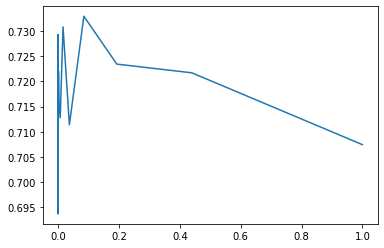

In [113]:
degree = 2
lambdas = np.logspace(-5, 0, 15)
method = 'penalized'
validationy[np.nonzero(validationy == 0)] = -1

tx = build_poly(trainx, degree)
validationtx = build_poly(validationx, degree)

weight = np.zeros(tx.shape[1])
accuracy = np.zeros(len(lambdas))

for ind, lambda_ in enumerate(lambdas):
    loss, w = running_gradient(trainyas, tx, lambda_, method)
    np.append(weight,w)
    predictions = predict_labels(w, validationtx)
    accuracy[ind] = calculate_classification_accuracy(validationy,predictions)
    
weights = w

plt.plot(lambdas,accuracy)
print(accuracy)

In [60]:
predictions = predict_labels(w, validationtx)

accuracy = calculate_classification_accuracy(validationy,predictions)
print(accuracy)

0.782224


## Generate predictions and save ouput in csv format for submission:

In [ ]:
DATA_TEST_PATH = 'C:/Users/joeld/Desktop/EPFL/machine learning/AIAIaie/data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [ ]:
Data_test = remove_features_with_too_many_missing_values(tX_test,0.66)
Data_test = replace_missing_values_with_global_mean(Data_test)
ZData_test = Z_score_of_each_feature(Data_test)

In [ ]:
OUTPUT_PATH = 'C:/Users/joeld/Desktop/EPFL/machine learning/AIAIaie/data/output.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, ZData_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)